#### makes features more complex , hereby allowing us to fit a simple model on the data

In [17]:
#10th notebook

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
# helper fn to gen poly data
def true_polynomial_fn(x):
    return 5*x*x*x + 3*x*x + 2*x + 12

In [15]:
np.random.seed(0)

n_samples = 30
degree = 3


X = np.sort(np.random.rand(n_samples))   # gen 30 diff X values
x = X.reshape(-1, 1)                     # reshape to 2d

y = true_polynomial_fn(x) + np.random.rand(n_samples) * 0.1   # target values

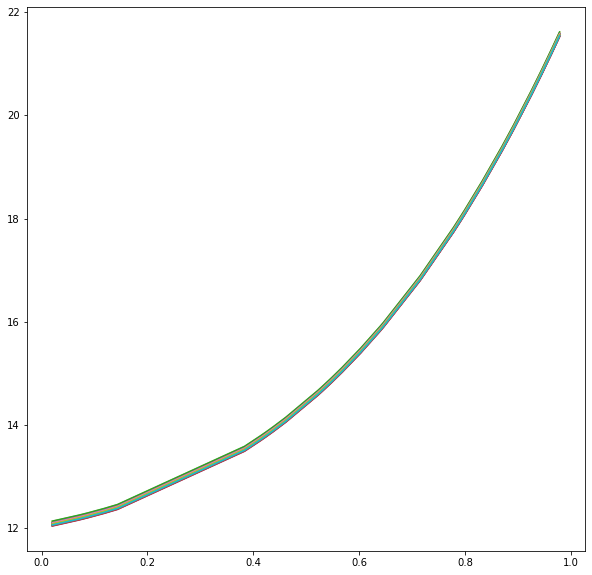

In [19]:
# viz data to check if polynomial
plt.figure(figsize = (10, 10))
plt.plot(x, y)

plt.show();

In [22]:
# try fitting lin reg model on data 
linear_regression_underfitted = LinearRegression().fit(x, y)

y_pred_underfitted = linear_regression_underfitted.predict(x)

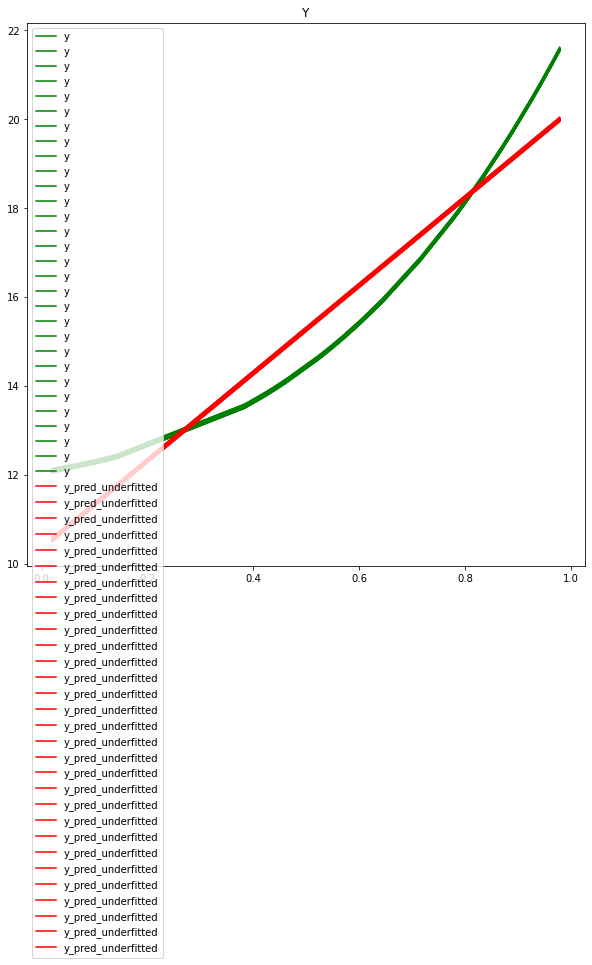

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(x, y, color = "green", label= "y")
plt.plot(x, y_pred_underfitted, color = "red", label = "y_pred_underfitted")

plt.title("Y")
plt.legend();

In [26]:
# poly features
polynomial_features = PolynomialFeatures(degree=3, include_bias=True)

polynomial_features.fit_transform(x)    # gen poly comb of x features for bias(since included), x1, x2 and x3

array([[1.00000000e+00, 2.02183974e-02, 4.08783595e-04, 8.26494919e-06],
       [1.00000000e+00, 7.10360582e-02, 5.04612156e-03, 3.58456585e-04],
       [1.00000000e+00, 8.71292997e-02, 7.59151487e-03, 6.61443374e-04],
       [1.00000000e+00, 1.18274426e-01, 1.39888398e-02, 1.65452200e-03],
       [1.00000000e+00, 1.43353287e-01, 2.05501650e-02, 2.94593371e-03],
       [1.00000000e+00, 3.83441519e-01, 1.47027398e-01, 5.63764089e-02],
       [1.00000000e+00, 4.14661940e-01, 1.71944524e-01, 7.12988501e-02],
       [1.00000000e+00, 4.23654799e-01, 1.79483389e-01, 7.60389992e-02],
       [1.00000000e+00, 4.37587211e-01, 1.91482567e-01, 8.37903227e-02],
       [1.00000000e+00, 4.61479362e-01, 2.12963202e-01, 9.82781225e-02],
       [1.00000000e+00, 5.21848322e-01, 2.72325671e-01, 1.42112694e-01],
       [1.00000000e+00, 5.28894920e-01, 2.79729836e-01, 1.47947689e-01],
       [1.00000000e+00, 5.44883183e-01, 2.96897683e-01, 1.61774555e-01],
       [1.00000000e+00, 5.48813504e-01, 3.01196262e

In [27]:
linear_regression = LinearRegression()
pipeline = Pipeline([
    ("polynomial_features", polynomial_features),
    ("linear_regression", linear_regression)
])

In [29]:
pipeline.fit(x, y)
y_predicted = pipeline.predict(x)

Text(0.5, 1.0, 'Y')

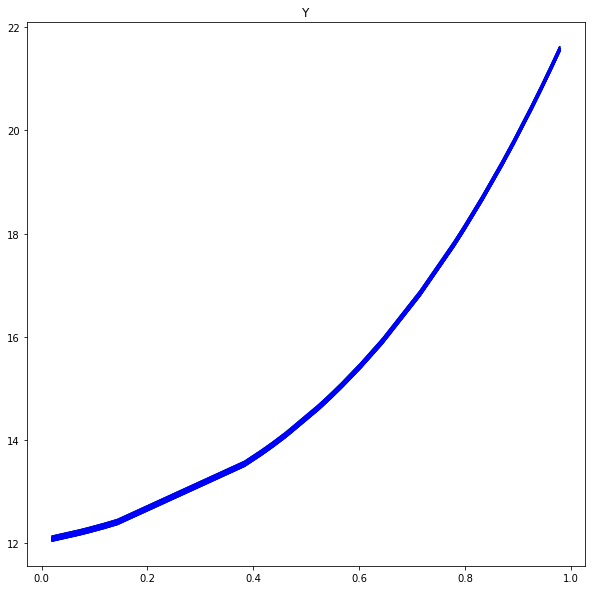

In [31]:
plt.figure(figsize=(10, 10))

plt.plot(x, y, color = "green", label= "y")
plt.plot(x, y_predicted, color = "blue", label = "y_predicted")

plt.title("Y")